<a href="https://colab.research.google.com/github/jacobalmon/2DGame/blob/main/Homework/Homework%204/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Generate sine wave dataset
num_samples = 1000
x = np.linspace(0, 100, num_samples)
y = np.sin(x)

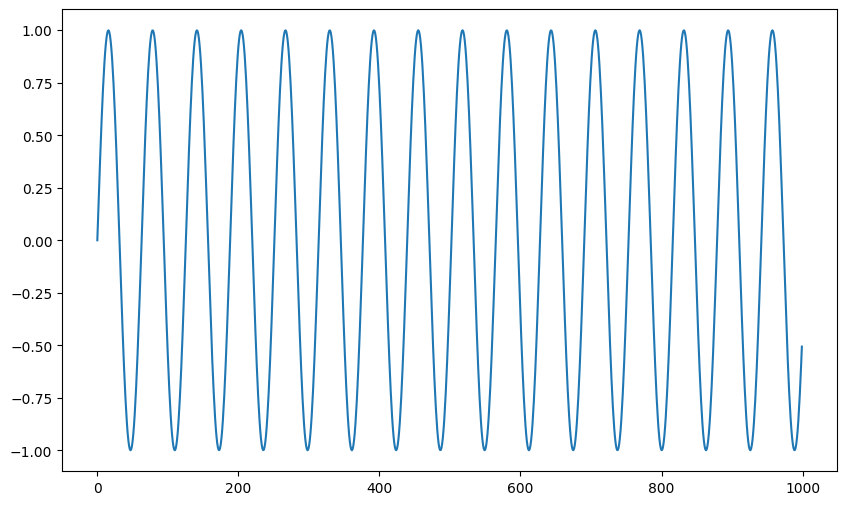

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.show()

In [ ]:
# Task 1: Data Preparation.
sequence_length = 50
X, Y = [], []

# Create Sequences with Output Values.
for i in range(len(y) - sequence_length):
    X.append(y[i:i+sequence_length])
    Y.append(y[i+sequence_length])

# Convert to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into Training and Testing Sets (80-20 Split).
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Shape of Each Set.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Reshape Training Set (2D -> 3D).
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Shape of Reshaped Training Set.
print("Shape of X_train after reshaping:", X_train.shape)
print("Shape of X_test after reshaping:", X_test.shape)

Shape of X_train: (760, 50)
Shape of X_test: (190, 50)
Shape of Y_train: (760,)
Shape of Y_test: (190,)
Shape of X_train after reshaping: (760, 50, 1)
Shape of X_test after reshaping: (190, 50, 1)


In [ ]:
# Task 2: Model Design.
# Tanh Model.
tanh_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# ReLU Model.
relu_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# Sigmoid Model.
sigmoid_model = Sequential([
    LSTM(50, activation='sigmoid', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Task 3: Training.
# Compile Models.
tanh_model.compile(optimizer='adam', loss='mse')
relu_model.compile(optimizer='adam', loss='mse')
sigmoid_model.compile(optimizer='adam', loss='mse')

# Train Models.
print("Training Tanh Model...")
tanh_model.fit(X_train, Y_train, epochs=20, batch_size=32)
print("Training ReLU Model...")
relu_model.fit(X_train, Y_train, epochs=20, batch_size=32)
print("Training Sigmoid Model...")
sigmoid_model.fit(X_train, Y_train, epochs=20, batch_size=32)

Training Tanh Model...
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3099
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5151e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7069e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7173e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2694e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2020e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7609e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7884e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5104e-05
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8024e-06
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2076e-06
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9891e-06
Epoch 15/20
24/24 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4871e-07 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0462e-05 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0068e-04 
Loss for Tanh Model: 4.827177804145322e-07
Loss for ReLU Model: 5.005327329854481e-05
Loss for Sigmoid Model: 0.000588992377743125
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


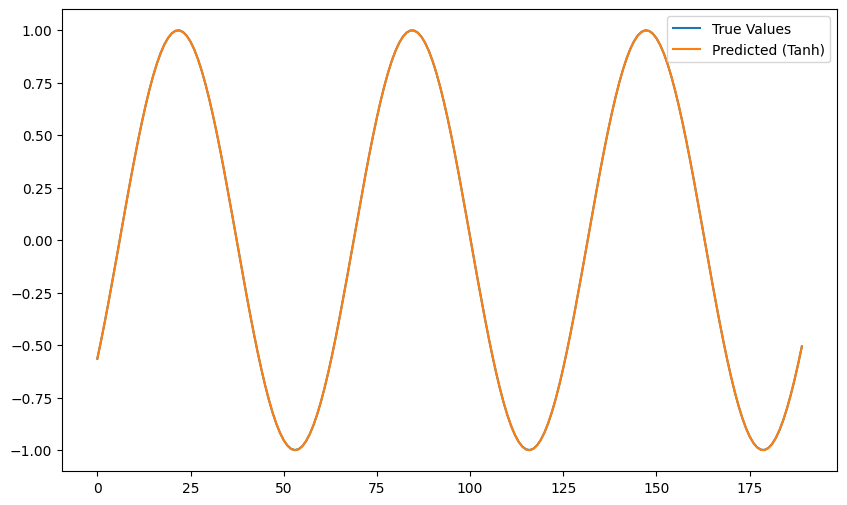

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


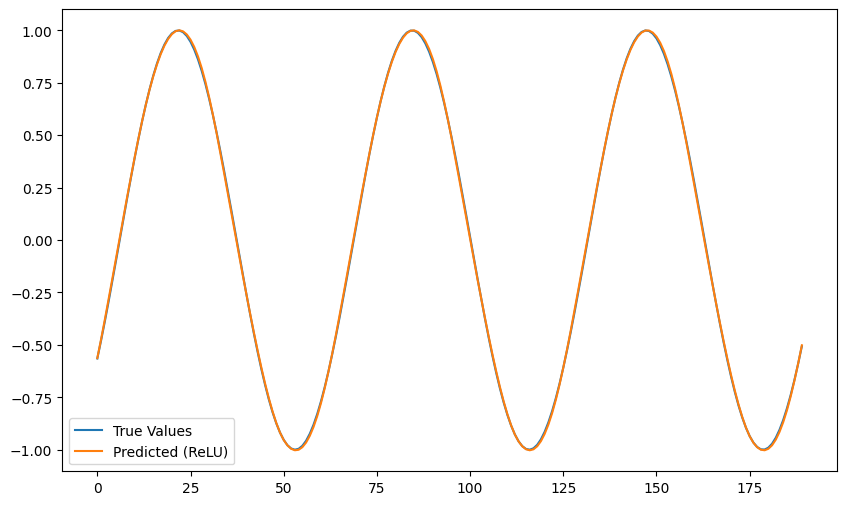

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


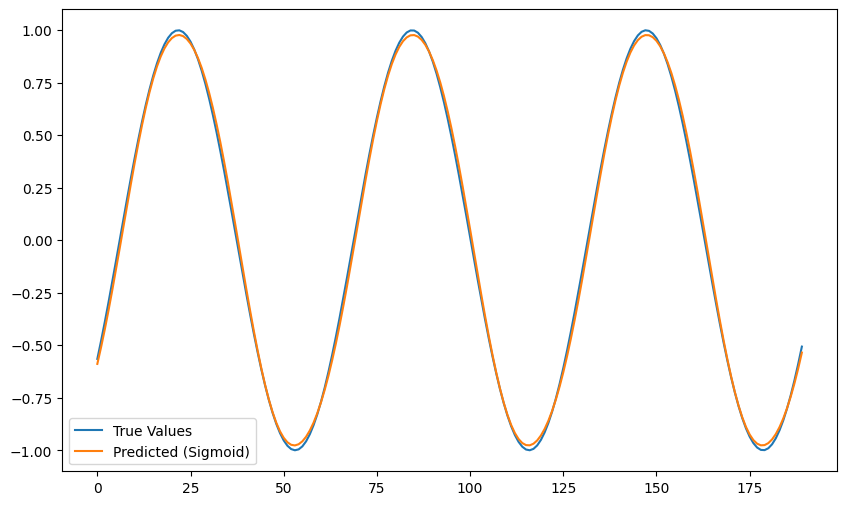

In [ ]:
# Task 4: Evaluation & Visualization.
# Evaluate Models on Test Set.
tanh_loss = tanh_model.evaluate(X_test, Y_test)
relu_loss = relu_model.evaluate(X_test, Y_test)
sigmoid_loss = sigmoid_model.evaluate(X_test, Y_test)

# Report Loss.
print("Loss for Tanh Model:", tanh_loss)
print("Loss for ReLU Model:", relu_loss)
print("Loss for Sigmoid Model:", sigmoid_loss)

# Plot True vs. Predicted Time Series. (Tanh)
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')
plt.plot(tanh_model.predict(X_test), label='Predicted (Tanh)')
plt.legend()
plt.show()

# Plot True vs. Predicted Time Series. (ReLU)
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')
plt.plot(relu_model.predict(X_test), label='Predicted (ReLU)')
plt.legend()
plt.show()

# Plot True vs. Predicted Time Series. (Sigmoid)
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')
plt.plot(sigmoid_model.predict(X_test), label='Predicted (Sigmoid)')
plt.legend()
plt.show()